# Features processing/engineering


## Imports


In [1]:
from functions import *
from numpy import zeros

## Preliminary Study


Displays examples of data


In [2]:
features_train = read_ds_gzip("../in-star-craft-2-player/TRAIN_LONG.CSV.GZ", "TRAIN")
features_train.tail(3)

,battleneturl,played_race,0,1,2,3,4,5,6,7,...,26813,26814,26815,26816,26817,26818,26819,26820,26821,26822
3049,http://xx.battle.net/sc2/en/profile/405/1/MMA/,Terran,4:CameraEvent:158.0:155.7578125,14:SelectionEvent:OrbitalCommandFlying,14:BasicCommandEvent:TrainSCV,18:SelectionEvent:SCV,20:TargetPointCommandEvent:156.681396484:160.1...,24:TargetUnitCommandEvent:CAbil:MineralField,30:SelectionEvent:OrbitalCommandFlying,34:TargetUnitCommandEvent:CAbil:MineralField,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3050,http://xx.battle.net/sc2/en/profile/410/1/STBo...,Terran,5:CameraEvent:26.99609375:134.7578125,14:SelectionEvent:OrbitalCommand,14:BasicCommandEvent:TrainSCV,18:SelectionEvent:SCV,21:TargetUnitCommandEvent:CAbil:MineralField,25:ControlGroupEvent:1:0,28:SelectionEvent:OrbitalCommand,28:ControlGroupEvent:2:0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051,http://xx.battle.net/sc2/en/profile/405/1/MMA/,Terran,4:CameraEvent:117.0:21.7578125,17:SelectionEvent:OrbitalCommand,17:BasicCommandEvent:TrainSCV,21:SelectionEvent:SCV,21:TargetPointCommandEvent:115.664550781:20.94...,25:TargetUnitCommandEvent:CAbil:MineralField,30:SelectionEvent:OrbitalCommand,36:ControlGroupEvent:1:0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extracting all possible selection objects to turn them into features


In [22]:
possible_selections = set()
for index, row in features_train.iterrows():
    for value in row:
        if isinstance(value, str) and "SelectionEvent" in value:
            for obj in value.split(":")[-1].split(";"):
                possible_selections.add(obj)

In [ ]:
possible_selections = [
    "Archon",
    "Armory",
    "Assimilator",
    "AutoTurret",
    "Baneling",
    "BanelingBurrowed",
    "BanelingCocoon",
    "BanelingNest",
    "Banshee",
    "Barracks",
    "BarracksFlying",
    "BarracksReactor",
    "BarracksTechLab",
    "BattleHellion",
    "Battlecruiser",
    "BroodLord",
    "BroodLordCocoon",
    "Broodling",
    "Bunker",
    "Carrier",
    "Changeling",
    "ChangelingMarine",
    "ChangelingMarineShield",
    "ChangelingZealot",
    "ChangelingZergling",
    "ChangelingZerglingWings",
    "CollapsibleRockTowerDebris",
    "CollapsibleRockTowerDebrisRampRight",
    "CollapsibleRockTowerDiagonal",
    "CollapsibleRockTowerRampRight",
    "Colossus",
    "CommandCenter",
    "CommandCenterFlying",
    "Corruptor",
    "CreepTumor",
    "CreepTumorBurrowed",
    "CreepTumorQueen",
    "CyberneticsCore",
    "DarkShrine",
    "DarkTemplar",
    "DestructibleDebris6x6",
    "DestructibleDebrisRampDiagonalHugeULBR",
    "DestructibleIce6x6",
    "DestructibleRampDiagonalHugeBLUR",
    "DestructibleRock6x6",
    "DestructibleRockEx16x6",
    "DestructibleRockEx1DiagonalHugeBLUR",
    "DestructibleRockEx1DiagonalHugeULBR",
    "Drone",
    "DroneBurrowed",
    "Egg",
    "EngineeringBay",
    "EvolutionChamber",
    "Extractor",
    "Factory",
    "FactoryFlying",
    "FactoryReactor",
    "FactoryTechLab",
    "FleetBeacon",
    "Forge",
    "FusionCore",
    "Gateway",
    "Ghost",
    "GhostAcademy",
    "GreaterSpire",
    "Hatchery",
    "Hellion",
    "HighTemplar",
    "Hive",
    "Hydralisk",
    "HydraliskBurrowed",
    "HydraliskDen",
    "Immortal",
    "InfestationPit",
    "InfestedTerran",
    "InfestedTerransEgg",
    "Infestor",
    "InfestorBurrowed",
    "KarakFemale",
    "LabBot",
    "LabMineralField",
    "Lair",
    "Larva",
    "Locust",
    "Lyote",
    "MULE",
    "Marauder",
    "Marine",
    "Medivac",
    "MineralField",
    "MissileTurret",
    "Mothership",
    "MothershipCore",
    "Mutalisk",
    "Nexus",
    "NydusNetwork",
    "NydusWorm",
    "Observer",
    "Oracle",
    "OrbitalCommand",
    "OrbitalCommandFlying",
    "Overlord",
    "Overseer",
    "OverseerCocoon",
    "Phoenix",
    "PhotonCannon",
    "PlanetaryFortress",
    "PointDefenseDrone",
    "Probe",
    "ProtossVespeneGeyser",
    "Pylon",
    "Queen",
    "QueenBurrowed",
    "Raven",
    "Reactor",
    "Reaper",
    "Refinery",
    "RichMineralField",
    "Roach",
    "RoachBurrowed",
    "RoachWarren",
    "RoboticsBay",
    "RoboticsFacility",
    "SCV",
    "Scantipede",
    "SensorTower",
    "Sentry",
    "SiegeTank",
    "SiegeTankSieged",
    "SpacePlatformGeyser",
    "SpawningPool",
    "SpineCrawler",
    "SpineCrawlerUprooted",
    "Spire",
    "SporeCrawler",
    "SporeCrawlerUprooted",
    "Stalker",
    "Stargate",
    "Starport",
    "StarportFlying",
    "StarportReactor",
    "StarportTechLab",
    "SupplyDepot",
    "SupplyDepotLowered",
    "SwarmHost",
    "SwarmHostBurrowed",
    "TechLab",
    "Tempest",
    "TemplarArchive",
    "Thor",
    "TwilightCouncil",
    "Ultralisk",
    "UltraliskBurrowed",
    "UltraliskCavern",
    "UnbuildableBricksDestructible",
    "UnbuildablePlatesDestructible",
    "UnbuildableRocksDestructible",
    "UrsadakCalf",
    "VespeneGeyser",
    "Viking",
    "VikingAssault",
    "Viper",
    "VoidRay",
    "WarpGate",
    "WarpPrism",
    "WarpPrismPhasing",
    "WidowMine",
    "WidowMineBurrowed",
    "XelNagaTower",
    "Zealot",
    "Zergling",
    "ZerglingBurrowed",
]

Creating DF with columns


In [ ]:
df_selections = pd.DataFrame(columns=possible_selections)
for index, row in features_train.iterrows():
    values = np.zeros(shape=len(possible_selections), dtype=int)

    for value in row:
        if isinstance(value, str) and "SelectionEvent" in value:
            for obj in value.split(":")[-1].split(";"):
                if obj != "":
                    values[possible_selections.index(obj)] += 1

    # Add the values to df_selections using .loc with the correct index
    df_selections.loc[index] = values

# Optionally, sort the DataFrame if you want to ensure it's ordered by index
df_selections = df_selections.sort_index()
df_selections.columns = ["selection_" + col for col in df_selections.columns]

In [23]:
df_selections

,selection_Archon,selection_Armory,selection_Assimilator,selection_AutoTurret,selection_Baneling,selection_BanelingBurrowed,selection_BanelingCocoon,selection_BanelingNest,selection_Banshee,selection_Barracks,...,selection_VoidRay,selection_WarpGate,selection_WarpPrism,selection_WarpPrismPhasing,selection_WidowMine,selection_WidowMineBurrowed,selection_XelNagaTower,selection_Zealot,selection_Zergling,selection_ZerglingBurrowed
0,21,0,1,0,0,0,0,0,0,0,...,0,19,0,0,0,0,1,79,0,0
1,16,0,1,0,0,0,0,0,0,0,...,0,25,0,11,0,0,0,147,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,26,5,0,0,0,0,40,0,0
3,7,0,1,0,0,0,0,0,0,0,...,0,27,0,1,0,0,0,30,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,7,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,0,0,0,0,0,0,0,0,13,15,...,0,0,0,0,1,0,0,0,0,0
3048,0,1,0,0,0,0,0,0,0,23,...,0,0,0,0,0,0,0,0,0,0
3049,0,1,0,0,0,0,0,0,23,30,...,0,0,0,0,0,0,0,0,0,0
3050,0,0,0,0,0,0,0,0,0,26,...,0,0,0,0,0,0,0,0,0,0


Extracting all basic command events


In [ ]:
possible_command_event = set()
for index, row in features_train.iterrows():
    for value in row:
        if isinstance(value, str) and "BasicCommandEvent" in value:
            possible_command_event.add(value.split(":")[-1])

In [ ]:
possible_command_event = [
    "ArchonWarpSelection",
    "ArmorpiercingMissiles",
    "AssaultMode",
    "BattleMode",
    "BuildBattleHellion",
    "BuildHellion",
    "BuildInterceptor",
    "BuildNuke",
    "BuildReactorFactory",
    "BuildReactorStarport",
    "BuildSiegeTank",
    "BuildTechLabFactory",
    "BuildTechLabStarport",
    "BuildThor",
    "BuildWidowMine",
    "BurrowBaneling",
    "BurrowDrone",
    "BurrowHydralisk",
    "BurrowInfestor",
    "BurrowQueen",
    "BurrowRoach",
    "BurrowSwarmHost",
    "BurrowUltralisk",
    "BurrowWidowMine",
    "BurrowZergling",
    "CancelBarracksAddon",
    "CancelBuilding",
    "CancelCreepTumor",
    "CancelFactoryAddOn",
    "CancelGravitonBeam",
    "CancelLast",
    "CancelMorph",
    "CancelMorphToGreaterSpire",
    "CancelMorphToOverseer",
    "CancelRootSpineCrawler",
    "CancelStarportAddon",
    "CancelTacticalNukeStrike",
    "CancelTerranBuilding",
    "CancelUpgradeToHive",
    "CancelUpgradeToLair",
    "CancelUpgradeToOrbitalCommand",
    "CancelUpgradeToPlanetaryFortress",
    "Cheer",
    "CloakBanshee",
    "CloakGhost",
    "Dance",
    "DecloakBanshee",
    "DecloakGhost",
    "DisableVolatileBurst",
    "Envision",
    "EvolveAdrenalGlands",
    "EvolveBurrow",
    "EvolveCentrifugalHooks",
    "EvolveChitinousPlating",
    "EvolveEnduringLocusts",
    "EvolveFlyerAttacks1",
    "EvolveFlyerAttacks2",
    "EvolveFlyerAttacks3",
    "EvolveFlyerCarapace1",
    "EvolveFlyerCarapace2",
    "EvolveFlyerCarapace3",
    "EvolveGlialReconstitution",
    "EvolveGroovedSpines",
    "EvolveGroundCarapace1",
    "EvolveGroundCarapace2",
    "EvolveGroundCarapace3",
    "EvolveMeleeAttacks1",
    "EvolveMeleeAttacks2",
    "EvolveMeleeAttacks3",
    "EvolveMetabolicBoost",
    "EvolveMissileAttacks1",
    "EvolveMissileAttacks2",
    "EvolveMissileAttacks3",
    "EvolveMuscularAugments",
    "EvolveNeuralParasite",
    "EvolvePathogenGlands",
    "EvolvePneumatizedCarapace",
    "EvolveTunnelingClaws",
    "EvolveVentralSacs",
    "Explode",
    "ExplosiveMissiles",
    "FighterMode",
    "GenerateCreep",
    "GuardianShield",
    "HallucinateArchon",
    "HallucinateColossus",
    "HallucinateImmortal",
    "HallucinateOracle",
    "HallucinatePhoenix",
    "HallucinateProbe",
    "HallucinateStalker",
    "HallucinateVoidRay",
    "HallucinateWarpPrism",
    "HallucinateZealot",
    "HaltBuilding",
    "HoldFireGhost",
    "HoldPosition",
    "LiftBarracks",
    "LiftCommandCenter",
    "LiftFactory",
    "LiftOrbitalCommand",
    "LiftStarport",
    "LoadAllCommandCenter",
    "LowerSupplyDepot",
    "MULERepair",
    "MedivacSpeedBoost",
    "MorphCorruptor",
    "MorphDrone",
    "MorphHydralisk",
    "MorphInfestor",
    "MorphMutalisk",
    "MorphOverlord",
    "MorphRoach",
    "MorphSwarmHost",
    "MorphToBaneling",
    "MorphToBroodLord",
    "MorphToGreaterSpire",
    "MorphToOverseer",
    "MorphUltralisk",
    "MorphViper",
    "MorphZergling",
    "OracleWeapon",
    "OracleWeaponOff",
    "PhasingMode",
    "PrismaticAlignment",
    "RaiseSupplyDepot",
    "ReactorBarracks",
    "ResearchAnionPulseCrystals",
    "ResearchBehemothReactor",
    "ResearchBlink",
    "ResearchCaduceusReactor",
    "ResearchCharge",
    "ResearchCloakingField",
    "ResearchCombatShield",
    "ResearchConcussiveShells",
    "ResearchCorvidReactor",
    "ResearchDrillingClaws",
    "ResearchDurableMaterials",
    "ResearchExtendedThermalLance",
    "ResearchFluxVanes",
    "ResearchGraviticBoosters",
    "ResearchGraviticDrive",
    "ResearchHiSecAutoTracking",
    "ResearchInfernalPreIgniter",
    "ResearchMoebiusReactor",
    "ResearchNeosteelFrame",
    "ResearchPersonalCloaking",
    "ResearchPsiStorm",
    "ResearchStimpack",
    "ResearchTransformationServos",
    "ResearchWarpGate",
    "ResearchWeaponRefit",
    "ReturnCargo",
    "SCVRepair",
    "SalvageShared",
    "SiegeMode",
    "SpawnChangeling",
    "SpawnLocusts",
    "StimpackRedirect",
    "Stop",
    "StopGenerateCreep",
    "StopRedirect",
    "StrikeMode",
    "TankMode",
    "TechLabBarracks",
    "TrainBanshee",
    "TrainBattlecruiser",
    "TrainCarrier",
    "TrainColossus",
    "TrainGhost",
    "TrainHighTemplar",
    "TrainImmortal",
    "TrainMarauder",
    "TrainMarine",
    "TrainMedivac",
    "TrainMothershipCore",
    "TrainObserver",
    "TrainOracle",
    "TrainPhoenix",
    "TrainProbe",
    "TrainQueen",
    "TrainRaven",
    "TrainReaper",
    "TrainSCV",
    "TrainSentry",
    "TrainStalker",
    "TrainTempest",
    "TrainViking",
    "TrainVoidRay",
    "TrainWarpPrism",
    "TrainZealot",
    "TransformToGateway",
    "TransformToWarpGate",
    "TransportMode",
    "UnburrowBaneling",
    "UnburrowDrone",
    "UnburrowHydralisk",
    "UnburrowInfestor",
    "UnburrowQueen",
    "UnburrowRoach",
    "UnburrowSwarmHost",
    "UnburrowUltralisk",
    "UnburrowWidowMine",
    "UnburrowZergling",
    "UnloadAllBunker",
    "UnloadAllCommandCenter",
    "UnloadAllNydus",
    "UpgradeAirArmor1",
    "UpgradeAirArmor2",
    "UpgradeAirArmor3",
    "UpgradeAirWeapons1",
    "UpgradeAirWeapons2",
    "UpgradeAirWeapons3",
    "UpgradeGroundArmor1",
    "UpgradeGroundArmor2",
    "UpgradeGroundArmor3",
    "UpgradeGroundWeapons1",
    "UpgradeGroundWeapons2",
    "UpgradeGroundWeapons3",
    "UpgradeShields1",
    "UpgradeShields2",
    "UpgradeShipWeapons1",
    "UpgradeStructureArmor",
    "UpgradeTerranInfantryArmor1",
    "UpgradeTerranInfantryArmor2",
    "UpgradeTerranInfantryArmor3",
    "UpgradeTerranInfantryWeapons1",
    "UpgradeTerranInfantryWeapons2",
    "UpgradeTerranInfantryWeapons3",
    "UpgradeToHive",
    "UpgradeToLair",
    "UpgradeToMothership",
    "UpgradeToOrbitalCommand",
    "UpgradeToPlanetaryFortress",
    "UpgradeVehicleWeapons1",
    "UpgradeVehicleWeapons2",
    "UpgradeVehicleWeapons3",
    "UpgradesShields3",
    "UprootSpineCrawler",
    "UprootSporeCrawler",
    "UseStimpack",
    "VehicleAndShipPlating1",
    "VehicleAndShipPlating2",
    "VehicleAndShipPlating3",
]

Creating DF with columns


In [ ]:
df_command_event = pd.DataFrame(columns=possible_command_event)
for index, row in features_train.iterrows():
    values = np.zeros(shape=len(possible_command_event), dtype=int)

    for value in row:
        if isinstance(value, str) and "BasicCommandEvent" in value:
            to_add = value.split(":")[-1]
            if to_add != "":
                values[possible_command_event.index(to_add)] += 1

    # Add the values to df_selections using .loc with the correct index
    df_command_event.loc[index] = values

# Optionally, sort the DataFrame if you want to ensure it's ordered by index
df_command_event = df_command_event.sort_index()
df_command_event.columns = ["commandevent_" + col for col in df_command_event.columns]

Extracting all possible target point command


In [26]:
possible_target_point_command = set()
for index, row in features_train.iterrows():
    for value in row:
        if isinstance(value, str) and "TargetPointCommandEvent" in value:
            possible_target_point_command.add(value.split(":")[-1])

In [ ]:
possible_target_point_command = [
    "Attack",
    "BlindingCloud",
    "Blink",
    "BuildArmory",
    "BuildAutoTurret",
    "BuildBanelingNest",
    "BuildBarracks",
    "BuildBunker",
    "BuildCommandCenter",
    "BuildCreepTumor",
    "BuildCyberneticsCore",
    "BuildDarkShrine",
    "BuildEngineeringBay",
    "BuildEvolutionChamber",
    "BuildFactory",
    "BuildFleetBeacon",
    "BuildForge",
    "BuildFusionCore",
    "BuildGateway",
    "BuildGhostAcademy",
    "BuildHatchery",
    "BuildHydraliskDen",
    "BuildInfestationPit",
    "BuildMissileTurret",
    "BuildNexus",
    "BuildNydusNetwork",
    "BuildNydusWorm",
    "BuildPhotonCannon",
    "BuildPointDefenseDrone",
    "BuildPylon",
    "BuildReactorFactory",
    "BuildReactorStarport",
    "BuildRoachWarren",
    "BuildRoboticsBay",
    "BuildRoboticsFacility",
    "BuildSensorTower",
    "BuildSpawningPool",
    "BuildSpineCrawler",
    "BuildSpire",
    "BuildSporeCrawler",
    "BuildStargate",
    "BuildStarport",
    "BuildSupplyDepot",
    "BuildTechLabFactory",
    "BuildTechLabStarport",
    "BuildTemplarArchive",
    "BuildTwilightCouncil",
    "BuildUltraliskCavern",
    "CAbil",
    "CalldownMULE",
    "CreepTumor",
    "EMPRound",
    "ForceField",
    "FungalGrowth",
    "LandBarracks",
    "LandCommandCenter",
    "LandFactory",
    "LandOrbitalCommand",
    "LandStarport",
    "Move",
    "Patrol",
    "PsionicStorm",
    "ReactorBarracks",
    "Revelation",
    "RootSpineCrawler",
    "RootSporeCrawler",
    "ScanMove",
    "ScannerSweep",
    "SetRallyPoint",
    "SetUnitRally",
    "SetWorkerRally",
    "SpawnInfestedTerran",
    "TacticalNukeStrike",
    "TechLabBarracks",
    "TemporalField",
    "UnloadTargetMedivac",
    "UnloadTargetOverlord",
    "UnloadTargetWarpPrism",
    "WarpInDarkTemplar",
    "WarpInHighTemplar",
    "WarpInSentry",
    "WarpInStalker",
    "WarpInZealot",
]

In [ ]:
df_selections = pd.DataFrame(columns=possible_selections)
for index, row in features_train.iterrows():
    values = np.zeros(shape=len(possible_selections), dtype=int)

    for value in row:
        if isinstance(value, str) and "SelectionEvent" in value:
            for obj in value.split(":")[-1].split(";"):
                if obj != "":
                    values[possible_selections.index(obj)] += 1

    # Add the values to df_selections using .loc with the correct index
    df_selections.loc[index] = values

# Optionally, sort the DataFrame if you want to ensure it's ordered by index
df_selections = df_selections.sort_index()
df_selections.columns = ["selection_" + col for col in df_selections.columns]

Extracting all possible target unit command event (ability and target)


In [32]:
possible_target_unit_command_ability = set()
possible_target_unit_command_target = set()
for index, row in features_train.iterrows():
    for value in row:
        if isinstance(value, str) and "TargetUnitCommandEvent" in value:
            pieces = value.split(":")
            possible_target_unit_command_ability.add(pieces[-2])
            possible_target_unit_command_target.add(pieces[-1])

In [ ]:
possible_target_unit_command_ability = [
    "Abduct",
    "Attack",
    "BuildAssimilator",
    "BuildExtractor",
    "BuildRefinery",
    "CAbil",
    "CalldownMULE",
    "Charge",
    "ChronoBoost",
    "Consume",
    "Contaminate",
    "Corruption",
    "ExtraSupplies",
    "Feedback",
    "Gather",
    "GravitonBeam",
    "InfestorNeuralParasite",
    "LoadTargetBunker",
    "MULERepair",
    "MassRecallMothershipCore",
    "MothershipCorePurifyNexus",
    "MothershipMassRecall",
    "Move",
    "QueenTransfusion",
    "SCVRepair",
    "ScanMove",
    "SeekerMissile",
    "SetRallyPoint",
    "SetUnitRally",
    "SetWorkerRally",
    "SniperRound",
    "SpawnLarva",
    "UnloadTargetMedivac",
    "UnloadTargetOverlord",
    "UnloadTargetWarpPrism",
    "YamatoGun",
]

In [ ]:
possible_target_unit_command_target = [
    "Archon",
    "Armory",
    "Assimilator",
    "AutoTurret",
    "Baneling",
    "BanelingBurrowed",
    "BanelingCocoon",
    "BanelingNest",
    "Banshee",
    "Barracks",
    "BarracksFlying",
    "BarracksReactor",
    "BarracksTechLab",
    "BattleHellion",
    "Battlecruiser",
    "BroodLord",
    "BroodLordCocoon",
    "Broodling",
    "Bunker",
    "Carrier",
    "Changeling",
    "ChangelingMarine",
    "ChangelingMarineShield",
    "ChangelingZealot",
    "ChangelingZergling",
    "ChangelingZerglingWings",
    "CleaningBot",
    "CollapsibleRockTowerDebris",
    "CollapsibleRockTowerDebrisRampRight",
    "CollapsibleRockTowerDiagonal",
    "CollapsibleRockTowerRampRight",
    "CollapsibleTerranTowerRampLeft",
    "Colossus",
    "CommandCenter",
    "CommandCenterFlying",
    "Corruptor",
    "CreepTumor",
    "CreepTumorBurrowed",
    "CreepTumorQueen",
    "CyberneticsCore",
    "DarkShrine",
    "DarkTemplar",
    "DestructibleDebris6x6",
    "DestructibleDebrisRampDiagonalHugeBLUR",
    "DestructibleDebrisRampDiagonalHugeULBR",
    "DestructibleIce6x6",
    "DestructibleRampDiagonalHugeULBR",
    "DestructibleRock2x4Vertical",
    "DestructibleRock6x6",
    "DestructibleRockEx16x6",
    "DestructibleRockEx1DiagonalHugeBLUR",
    "DestructibleRockEx1DiagonalHugeULBR",
    "Drone",
    "DroneBurrowed",
    "Egg",
    "EngineeringBay",
    "EvolutionChamber",
    "Extractor",
    "Factory",
    "FactoryFlying",
    "FactoryReactor",
    "FactoryTechLab",
    "FleetBeacon",
    "Forge",
    "FusionCore",
    "Gateway",
    "Ghost",
    "GhostAcademy",
    "GreaterSpire",
    "Hatchery",
    "Hellion",
    "HighTemplar",
    "Hive",
    "Hydralisk",
    "HydraliskBurrowed",
    "HydraliskDen",
    "Immortal",
    "InfestationPit",
    "InfestedTerran",
    "InfestedTerransEgg",
    "Infestor",
    "InfestorBurrowed",
    "KarakFemale",
    "LabBot",
    "LabMineralField",
    "Lair",
    "Larva",
    "Locust",
    "Lyote",
    "MULE",
    "Marauder",
    "Marine",
    "Medivac",
    "MineralField",
    "MissileTurret",
    "Mothership",
    "MothershipCore",
    "Mutalisk",
    "Nexus",
    "NydusNetwork",
    "NydusWorm",
    "Observer",
    "Oracle",
    "OrbitalCommand",
    "OrbitalCommandFlying",
    "Overlord",
    "Overseer",
    "OverseerCocoon",
    "Phoenix",
    "PhotonCannon",
    "PhysicsCube",
    "PlanetaryFortress",
    "PointDefenseDrone",
    "Probe",
    "ProtossVespeneGeyser",
    "Pylon",
    "Queen",
    "QueenBurrowed",
    "Raven",
    "Reactor",
    "Reaper",
    "Refinery",
    "RichMineralField",
    "RichVespeneGeyser",
    "Roach",
    "RoachBurrowed",
    "RoachWarren",
    "RoboticsBay",
    "RoboticsFacility",
    "SCV",
    "Scantipede",
    "SensorTower",
    "Sentry",
    "SiegeTank",
    "SiegeTankSieged",
    "SpacePlatformGeyser",
    "SpawningPool",
    "SpineCrawler",
    "SpineCrawlerUprooted",
    "Spire",
    "SporeCrawler",
    "SporeCrawlerUprooted",
    "Stalker",
    "Stargate",
    "Starport",
    "StarportFlying",
    "StarportReactor",
    "StarportTechLab",
    "SupplyDepot",
    "SupplyDepotLowered",
    "SwarmHost",
    "SwarmHostBurrowed",
    "TechLab",
    "Tempest",
    "TemplarArchive",
    "Thor",
    "TwilightCouncil",
    "Ultralisk",
    "UltraliskBurrowed",
    "UltraliskCavern",
    "UnbuildableBricksDestructible",
    "UnbuildablePlatesDestructible",
    "UnbuildableRocksDestructible",
    "UnbuildableRocksUnit",
    "UrsadakCalf",
    "VespeneGeyser",
    "Viking",
    "VikingAssault",
    "Viper",
    "VoidRay",
    "WarpGate",
    "WarpPrism",
    "WarpPrismPhasing",
    "WidowMine",
    "WidowMineBurrowed",
    "XelNagaTower",
    "Zealot",
    "Zergling",
    "ZerglingBurrowed",
]

Extracting the number of different tokens from chat (to see if it is possible to turn them into features)


In [36]:
tokens = set()
for index, row in features_train.iterrows():
    for value in row:
        if isinstance(value, str) and "ChatEvent" in value:
            for token in value.split(":")[-1][1:-2].split(" "):
                tokens.add(token)

In [37]:
tokens

{'',
 '!',
 '#mat',
 '&',
 "'g",
 '*wink*',
 '-',
 '-.',
 '-_',
 '-___-',
 '.',
 '..',
 '......',
 '._',
 '1',
 '11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111',
 '1111111414141',
 '11313131313',
 '14',
 '1700',
 '1870',
 '1min',
 '1t',
 '2',
 '20',
 '22',
 '3',
 '30sec',
 '323232323',
 '3323232',
 '4',
 '400',
 '4141414141',
 '414141414141',
 '424242',
 '42a4',
 '4aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 '535353535',
 '6',
 '77hour',
 ';',
 ';)',
 ';;;;',
 '<',
 '=',
 '=(',
 '?',
 '?-.',
 '??',
 'Admin',
 'All',
 'BLURG',
 'Blurg',
 'CONGRA',
 'DDDDDDDDD',
 'DO',
 'Do',
 'Fix',
 'Freezing',
 'G',
 'GG',
 'GGW',
 'GL',
 'GOG',
 'Gg',
 'Ggw',
 'Gl',
 'Go',
 'Gog',
 'Gogo',
 'H',
 'HAVE',
 'I',
 'Last',

Some checks


In [35]:
print(possible_target_unit_command_target == possible_selections)

False


Adding once again the **number of actions done (freed from time steps) through the game**, its **duration**, and the **mean number of actions per second**.


In [3]:
features_train["first_nan_index"] = features_train.apply(first_nan_occurrence, axis=1)

In [4]:
features_train["first_nan_index"] = pd.to_numeric(
    features_train["first_nan_index"], errors="coerce"
)

In [5]:
def max_t_value_long(row):
    if pd.isna(row["first_nan_index"]):
        first_nan_index = 0
        return row.iloc[0]
    else:
        first_nan_index = int(row["first_nan_index"])
        cell = row.iloc[first_nan_index + 1]
    return cell.split(":")[0]

In [6]:
features_train["max_t_value"] = features_train.apply(max_t_value_long, axis=1)

In [7]:
features_train["max_t_value"] = pd.to_numeric(
    features_train["max_t_value"], errors="coerce"
)

In [8]:
features_train["max_t_value"] = features_train["max_t_value"] / 16

In [9]:
features_train["action_per_sec"] = (
    features_train["first_nan_index"] / features_train["max_t_value"]
)

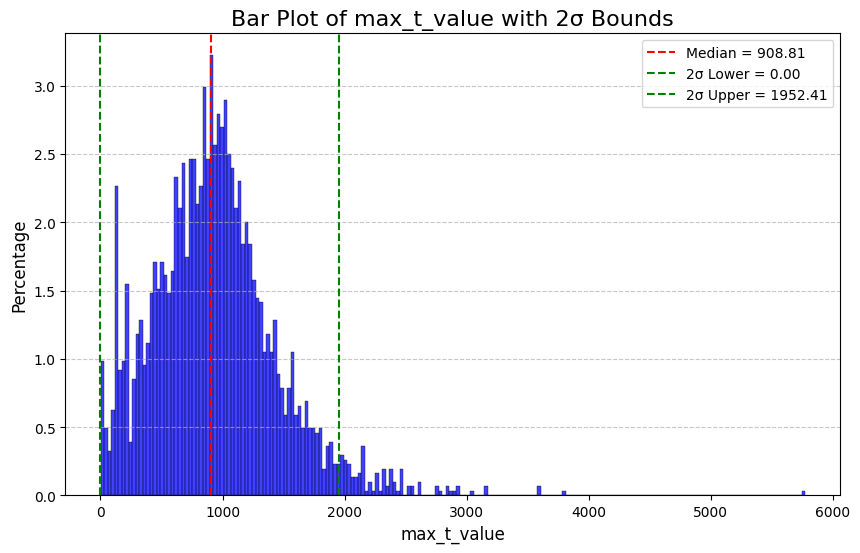

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data preparation
data = features_train["max_t_value"].dropna()
mean = data.mean()
std = data.std()
median = data.median()
lower_bound = max(0, mean - 2 * std)
upper_bound = mean + 2 * std

# Plotting the barplot with y-axis in percentages
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=200, kde=False, color="blue", stat="percent")
plt.axvline(median, color="red", linestyle="--", label=f"Median = {median:.2f}")
plt.axvline(
    lower_bound, color="green", linestyle="--", label=f"2σ Lower = {lower_bound:.2f}"
)
plt.axvline(
    upper_bound, color="green", linestyle="--", label=f"2σ Upper = {upper_bound:.2f}"
)

# Adding titles and labels
plt.title("Bar Plot of max_t_value with 2σ Bounds", fontsize=16)
plt.xlabel("max_t_value", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [10]:
data = features_train["max_t_value"].dropna()

# Calculate mean, median, and standard deviation
d_mean = data.mean()
median = data.median()
std = data.std()

# Calculate 2σ bounds and ensure the lower bound is not negative
lower_bound = max(d_mean - 2 * std, 0)  # Ensure lower bound is at least 0
upper_bound = max(features_train["max_t_value"])

# Filter the entire DataFrame based on 'max_t_value' being within the 2σ bounds
filtered_features_train = features_train[
    features_train["max_t_value"].between(lower_bound, upper_bound)
]

**Turning played races to one hot coding.**


In [11]:
filtered_features_train["played_protoss"] = (
    filtered_features_train["played_race"] == "Protoss"
).astype(int)
filtered_features_train["played_terran"] = (
    filtered_features_train["played_race"] == "Terran"
).astype(int)
filtered_features_train["played_zerg"] = (
    filtered_features_train["played_race"] == "Zerg"
).astype(int)

filtered_features_train = filtered_features_train.drop(columns=["played_race"])

/var/folders/m_/717x69rd7nz8wyvtvlgk_rlm0000gn/T/ipykernel_41977/925400731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_features_train["played_protoss"] = (
/var/folders/m_/717x69rd7nz8wyvtvlgk_rlm0000gn/T/ipykernel_41977/925400731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_features_train["played_terran"] = (
/var/folders/m_/717x69rd7nz8wyvtvlgk_rlm0000gn/T/ipykernel_41977/925400731.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
# def train_unit_per_sec(row):
#     train_count = 0

#     for value in row:
#         value_str = str(value)

#         train_count += value_str.count("BasicCommandEvent:Train")

#     max_t_value = row["max_t_value"]

#     return train_count / max_t_value if max_t_value > 0 else 0

In [12]:
def camera_per_sec(row):
    camera_count = 0

    for value in row:
        value_str = str(value)

        camera_count += value_str.count("CameraEvent")

    max_t_value = row["max_t_value"]

    return camera_count / max_t_value if max_t_value > 0 else 0

In [13]:
# filtered_features_train["train_unit_per_sec"] = filtered_features_train.apply(
#     train_unit_per_sec, axis=1
# )

filtered_features_train["camera_per_sec"] = filtered_features_train.apply(
    camera_per_sec, axis=1
)
filtered_features_train

,battleneturl,0,1,2,3,4,5,6,7,8,...,26820,26821,26822,first_nan_index,max_t_value,action_per_sec,played_protoss,played_terran,played_zerg,camera_per_sec
0,http://eu.battle.net/sc2/en/profile/4234852/1/...,6:CameraEvent:26.0:155.7578125,16:SelectionEvent:Nexus,18:BasicCommandEvent:TrainProbe,21:SelectionEvent:Probe;Probe,25:TargetPointCommandEvent:27.7021484375:162.0...,32:SelectionEvent:Probe,33:TargetUnitCommandEvent:CAbil:MineralField,43:SelectionEvent:Probe,44:TargetPointCommandEvent:26.1865234375:161.0...,...,NaN,NaN,NaN,6693.0,1654.7500,4.044720,1,0,0,0.995921
1,http://eu.battle.net/sc2/en/profile/3074362/1/...,6:CameraEvent:158.0:24.7578125,21:SelectionEvent:Probe;Probe,22:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:Nexus,29:BasicCommandEvent:TrainProbe,32:SelectionEvent:Probe,33:TargetUnitCommandEvent:CAbil:MineralField,40:SelectionEvent:Nexus,49:SelectionEvent:Probe,...,NaN,NaN,NaN,897.0,240.6250,3.727792,1,0,0,6.462338
2,http://eu.battle.net/sc2/en/profile/4234852/1/...,4:CameraEvent:140.0:24.7578125,14:SelectionEvent:Nexus,16:BasicCommandEvent:TrainProbe,18:SelectionEvent:Probe;Probe,21:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:Probe,30:TargetUnitCommandEvent:CAbil:MineralField,34:TargetUnitCommandEvent:CAbil:MineralField,40:SelectionEvent:Nexus,...,NaN,NaN,NaN,3495.0,892.2500,3.917064,1,0,0,0.947044
3,http://eu.battle.net/sc2/en/profile/3074362/1/...,5:CameraEvent:28.0:135.7578125,14:SelectionEvent:Nexus,16:BasicCommandEvent:TrainProbe,20:SelectionEvent:Probe;Probe,22:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:Nexus,32:SelectionEvent:Probe,34:TargetUnitCommandEvent:CAbil:MineralField,49:SelectionEvent:Probe,...,NaN,NaN,NaN,892.0,254.6875,3.502331,1,0,0,3.608344
4,http://eu.battle.net/sc2/en/profile/4234852/1/...,5:CameraEvent:20.0:37.2578125,16:SelectionEvent:Nexus,18:BasicCommandEvent:TrainProbe,21:SelectionEvent:Probe;Probe,24:TargetUnitCommandEvent:CAbil:MineralField,29:SelectionEvent:Probe,33:TargetUnitCommandEvent:CAbil:MineralField,40:SelectionEvent:Nexus,44:TargetUnitCommandEvent:CAbil:MineralField,...,NaN,NaN,NaN,1967.0,539.4375,3.646391,1,0,0,0.876839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,http://xx.battle.net/sc2/en/profile/405/1/MMA/,4:CameraEvent:22.0:136.7578125,13:SelectionEvent:OrbitalCommand,14:BasicCommandEvent:TrainSCV,17:SelectionEvent:SCV;SCV,18:TargetPointCommandEvent:20.1879882812:136.9...,22:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:OrbitalCommand,32:SelectionEvent:SCV;SCV;SCV;SCV;SCV;SCV,37:SelectionEvent:OrbitalCommand,...,NaN,NaN,NaN,3849.0,763.1250,5.043735,0,1,0,1.299918
3048,http://xx.battle.net/sc2/en/profile/410/1/STBo...,5:CameraEvent:158.0:24.7578125,14:SelectionEvent:OrbitalCommand,16:BasicCommandEvent:TrainSCV,22:TargetUnitCommandEvent:CAbil:MineralField,48:SelectionEvent:SCV,52:TargetUnitCommandEvent:CAbil:MineralField,56:TargetUnitCommandEvent:CAbil:MineralField,60:ControlGroupEvent:1:0,63:SelectionEvent:OrbitalCommand,...,NaN,NaN,NaN,6053.0,1109.1250,5.457455,0,1,0,1.070213
3049,http://xx.battle.net/sc2/en/profile/405/1/MMA/,4:CameraEvent:158.0:155.7578125,14:SelectionEvent:OrbitalCommandFlying,14:BasicCommandEvent:TrainSCV,18:SelectionEvent:SCV,20:TargetPointCommandEvent:156.681396484:160.1...,24:TargetUnitCommandEvent:CAbil:MineralField,30:SelectionEvent:OrbitalCommandFlying,34:TargetUnitCommandEvent:CAbil:MineralField,36:ControlGroupEvent:1:0,...,NaN,NaN,NaN,2070.0,392.3750,5.275565,0,1,0,3.675056
3050,http://xx.battle.net/sc2/en/profile/410/1/STBo...,5:CameraEvent:26.99609375:134.7578125,14:SelectionEvent:OrbitalCommand,14:BasicCommandEvent:TrainSCV,18:SelectionEvent:SCV,21:TargetUnitCommandEvent:CAbil:MineralField,25:ControlGroupEvent:1:0,28:SelectionEvent:OrbitalCommand,28:ControlGroupEvent:2:0,33:SelectionEvent:SCV;SCV;SCV;SCV;SCV,...,NaN,NaN,NaN,3276.0,583.6875,5.612592,0,1,0,0.503694


In [ ]:
def chat_per_sec(row):
    chat_count = 0

    for value in row:
        value_str = str(value)

        chat_count += value_str.count("ChatEvent")

    max_t_value = row["max_t_value"]

    return chat_count / max_t_value if max_t_value > 0 else 0


filtered_features_train["chat_per_sec"] = filtered_features_train.apply(
    chat_per_sec, axis=1
)
filtered_features_train

,battleneturl,0,1,2,3,4,5,6,7,8,...,26821,26822,first_nan_index,max_t_value,action_per_sec,played_protoss,played_terran,played_zerg,camera_per_sec,chat_per_sec
0,http://eu.battle.net/sc2/en/profile/4234852/1/...,6:CameraEvent:26.0:155.7578125,16:SelectionEvent:Nexus,18:BasicCommandEvent:TrainProbe,21:SelectionEvent:Probe;Probe,25:TargetPointCommandEvent:27.7021484375:162.0...,32:SelectionEvent:Probe,33:TargetUnitCommandEvent:CAbil:MineralField,43:SelectionEvent:Probe,44:TargetPointCommandEvent:26.1865234375:161.0...,...,NaN,NaN,6693.0,1654.7500,4.044720,1,0,0,0.995921,0.000604
1,http://eu.battle.net/sc2/en/profile/3074362/1/...,6:CameraEvent:158.0:24.7578125,21:SelectionEvent:Probe;Probe,22:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:Nexus,29:BasicCommandEvent:TrainProbe,32:SelectionEvent:Probe,33:TargetUnitCommandEvent:CAbil:MineralField,40:SelectionEvent:Nexus,49:SelectionEvent:Probe,...,NaN,NaN,897.0,240.6250,3.727792,1,0,0,6.462338,0.000000
2,http://eu.battle.net/sc2/en/profile/4234852/1/...,4:CameraEvent:140.0:24.7578125,14:SelectionEvent:Nexus,16:BasicCommandEvent:TrainProbe,18:SelectionEvent:Probe;Probe,21:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:Probe,30:TargetUnitCommandEvent:CAbil:MineralField,34:TargetUnitCommandEvent:CAbil:MineralField,40:SelectionEvent:Nexus,...,NaN,NaN,3495.0,892.2500,3.917064,1,0,0,0.947044,0.000000
3,http://eu.battle.net/sc2/en/profile/3074362/1/...,5:CameraEvent:28.0:135.7578125,14:SelectionEvent:Nexus,16:BasicCommandEvent:TrainProbe,20:SelectionEvent:Probe;Probe,22:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:Nexus,32:SelectionEvent:Probe,34:TargetUnitCommandEvent:CAbil:MineralField,49:SelectionEvent:Probe,...,NaN,NaN,892.0,254.6875,3.502331,1,0,0,3.608344,0.003926
4,http://eu.battle.net/sc2/en/profile/4234852/1/...,5:CameraEvent:20.0:37.2578125,16:SelectionEvent:Nexus,18:BasicCommandEvent:TrainProbe,21:SelectionEvent:Probe;Probe,24:TargetUnitCommandEvent:CAbil:MineralField,29:SelectionEvent:Probe,33:TargetUnitCommandEvent:CAbil:MineralField,40:SelectionEvent:Nexus,44:TargetUnitCommandEvent:CAbil:MineralField,...,NaN,NaN,1967.0,539.4375,3.646391,1,0,0,0.876839,0.001854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,http://xx.battle.net/sc2/en/profile/405/1/MMA/,4:CameraEvent:22.0:136.7578125,13:SelectionEvent:OrbitalCommand,14:BasicCommandEvent:TrainSCV,17:SelectionEvent:SCV;SCV,18:TargetPointCommandEvent:20.1879882812:136.9...,22:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:OrbitalCommand,32:SelectionEvent:SCV;SCV;SCV;SCV;SCV;SCV,37:SelectionEvent:OrbitalCommand,...,NaN,NaN,3849.0,763.1250,5.043735,0,1,0,1.299918,0.001310
3048,http://xx.battle.net/sc2/en/profile/410/1/STBo...,5:CameraEvent:158.0:24.7578125,14:SelectionEvent:OrbitalCommand,16:BasicCommandEvent:TrainSCV,22:TargetUnitCommandEvent:CAbil:MineralField,48:SelectionEvent:SCV,52:TargetUnitCommandEvent:CAbil:MineralField,56:TargetUnitCommandEvent:CAbil:MineralField,60:ControlGroupEvent:1:0,63:SelectionEvent:OrbitalCommand,...,NaN,NaN,6053.0,1109.1250,5.457455,0,1,0,1.070213,0.000000
3049,http://xx.battle.net/sc2/en/profile/405/1/MMA/,4:CameraEvent:158.0:155.7578125,14:SelectionEvent:OrbitalCommandFlying,14:BasicCommandEvent:TrainSCV,18:SelectionEvent:SCV,20:TargetPointCommandEvent:156.681396484:160.1...,24:TargetUnitCommandEvent:CAbil:MineralField,30:SelectionEvent:OrbitalCommandFlying,34:TargetUnitCommandEvent:CAbil:MineralField,36:ControlGroupEvent:1:0,...,NaN,NaN,2070.0,392.3750,5.275565,0,1,0,3.675056,0.002549
3050,http://xx.battle.net/sc2/en/profile/410/1/STBo...,5:CameraEvent:26.99609375:134.7578125,14:SelectionEvent:OrbitalCommand,14:BasicCommandEvent:TrainSCV,18:SelectionEvent:SCV,21:TargetUnitCommandEvent:CAbil:MineralField,25:ControlGroupEvent:1:0,28:SelectionEvent:OrbitalCommand,28:ControlGroupEvent:2:0,33:SelectionEvent:SCV;SCV;SCV;SCV;SCV,...,NaN,NaN,3276.0,583.6875,5.612592,0,1,0,0.503694,0.001713


In [15]:
simple_data = filtered_features_train[
    [
        "battleneturl",
        "max_t_value",
        "action_per_sec",
        "played_protoss",
        "played_terran",
        "played_zerg",
        # "train_unit_per_sec",
        "camera_per_sec",
        "chat_per_sec",
        # "actions_before_t5",
        # "actions_before_t10",
        # "max_actions_between_t",
        # "min_actions_between_t",
    ]
]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = simple_data.drop(["battleneturl"], axis=1)
y = simple_data["battleneturl"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf_model = RandomForestClassifier(
    random_state=42,
    max_depth=30,
    max_features="log2",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

                                                             precision    recall  f1-score   support

      http://eu.battle.net/sc2/en/profile/1021189/1/Dayshi/     0.6667    0.5000    0.5714         4
 http://eu.battle.net/sc2/en/profile/1058669/1/EmpireHappy/     0.5000    0.5000    0.5000         2
       http://eu.battle.net/sc2/en/profile/1058669/1/Happy/     0.0000    0.0000    0.0000         3
  http://eu.battle.net/sc2/en/profile/1139573/1/BabyKnight/     0.4000    0.4000    0.4000         5
    http://eu.battle.net/sc2/en/profile/1143713/1/uThermal/     0.3333    0.3333    0.3333         3
http://eu.battle.net/sc2/en/profile/1173786/1/VPbenQsLivko/     0.0000    0.0000    0.0000         2
    http://eu.battle.net/sc2/en/profile/1430346/1/ShoWTimE/     0.0000    0.0000    0.0000         2
     http://eu.battle.net/sc2/en/profile/2048063/1/AcerBly/     0.0000    0.0000    0.0000         3
    http://eu.battle.net/sc2/en/profile/2101268/1/Stephano/     0.0000    0.0000    0.0000

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.